# Pick 'n mix

Here we demonstrate how to **pick `n mix** the GRASP variations using the classes we have created.

## Imports

In [1]:
import numpy as np
import sys

## `metapy` imports

In [2]:
# install metapy if running in Google Colab
if 'google.colab' in sys.modules:
    !pip install meta-py

In [3]:
from metapy.tsp import tsp_io as io
from metapy.tsp.euclidean import gen_matrix, plot_tour

from metapy.tsp.objective import OptimisedSimpleTSPObjective

from metapy.local_search.hill_climbing import (HillClimber, TweakTwoOpt)

from metapy.tsp.grasp import (SemiGreedyConstructor, 
                              ConstructorWithMemory,
                              FixedRCLSizer,
                              RandomRCLSizer,
                              ReactiveRCLSizer,
                              MonitoredLocalSearch,
                              RandomPlusGreedyConstructor,
                              GRASP)

## Load problem

In [4]:
#load file
file_path = 'https://raw.githubusercontent.com/TomMonks/meta-py/main/data/st70.tsp'

#number of rows in the file that are meta_data
md_rows = 6

#read the coordinates
cities = io.read_coordinates(file_path, md_rows)
matrix = gen_matrix(cities, as_integer=True)

## Composing an algorithm

The below picks and mixes a few of the variations.

* Probabilistic selection of RCL Size
* Random-Greedy construction.
* Construction has a short term tabu memory.

In [5]:
def compose_grasp(tour, matrix, max_iter=50, rcl_min=2, rcl_max=15, 
                  memory_size=100, seeds=(None, None)):

    # objective function
    obj = OptimisedSimpleTSPObjective(-matrix)

    # Two-opt tweaks
    tweaker = TweakTwoOpt(random_seed=None)

    # local search = first improvement hill climbing
    ls = HillClimber(obj, tour, tweaker)

    # semi-greedy constructor and Random RCL sizer
    sizer = RandomRCLSizer(np.arange(rcl_min, rcl_max), random_seed=seeds[0])
    constructor = RandomPlusGreedyConstructor(sizer, tour, -matrix, p_rand=0.2, 
                                              random_seed=seeds[1])
    # add memory to constructor
    constructor = ConstructorWithMemory(constructor, memory_size)

    # GRASP framework
    solver = GRASP(constructor, ls, max_iter=max_iter)
    
    return solver


Running REACTIVE GRASP

** GRASP OUTPUT ***
best cost:	-760.0
best solutions:
[ 0 35 28 12 69 30 68 34 58 21 37 22 15 46 36 57 49 50 55 64 63 10 66 47
 53 61 38 24 44 60 39 45 26  8 42 16 20 33 11 32 59 51  9  4 52  5 40 41
 17  3  1 31  2 43 67 29 19 13 27 48 54 25  7  6 18 23 56 65 62 14]


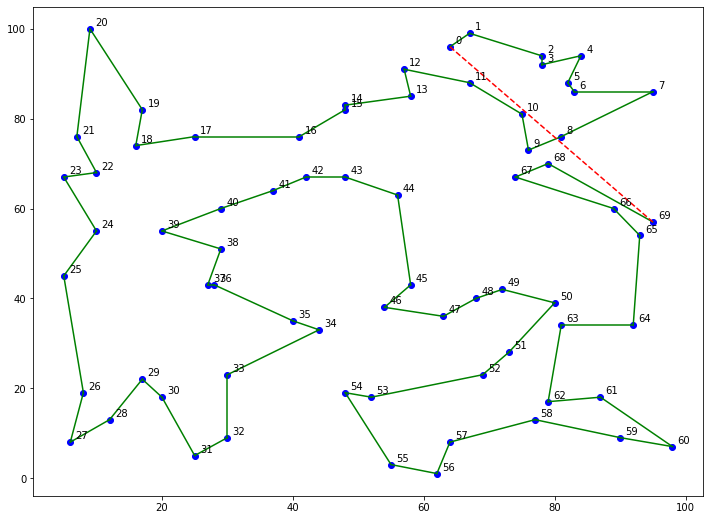

In [6]:
tour = np.arange(len(cities))
solver = compose_grasp(tour, matrix, seeds=(42, 101))
print("\nRunning Pick and Mix GRASP")
solver.solve()

print("\n** GRASP OUTPUT ***")
print(f"best cost:\t{solver.best}")
print("best solutions:")
print(solver.best_solution)
fig, ax = plot_tour(solver.best_solution, cities, figsize=(12,9))